In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import BayesianClassifierHW2 as BC
import MaxLikelihoodEstimator as ML
import ImageClassifier as IC

# Experiment 1

## Part (a)
### Using exactly the same 200,000 samples from assignment #1 (i.e., 60,000 samples from N(μ1,Σ1) and 140,000 samples from N(μ2,Σ2)), estimate the parameters of each distribution using the ML approach. Then, classify all 200,000 samples using a Bayes classifier, count the number of misclassifications (for each class and overall), and compare your results with those obtained from assignment #1.

In [3]:
# data A params
mu1 = np.array([1,1])
cov1 = np.array([[1,0],[0,1]])
mu2 = np.array([4,4])
cov2 = np.array([[1,0],[0,1]])

mu= [mu1,mu2 ]
cov =[cov1, cov2]
n_samples= [60000,140000]

In [4]:
datasetA_ML = ML.ML_Estimator(mu,cov, n_samples)

## classify using the ML estimated mu and cov params 
datasetA_ML.classify_using_ML_estimates(print_params=True,)  

ML_estimated_boundary = datasetA_ML.boundary_function

datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [0.9947335309849321, 0.9993340872355969]
Sample 2 : [3.9989997647685853, 3.9951898904939456]

 ML Estimated Covariances: 

Sample 1 : [[ 0.99284676 -0.00905706]
 [-0.00905706  1.00031409]]
Sample 2 : [[ 0.99645636 -0.00154648]
 [-0.00154648  0.99716691]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1627, 1399]
Misclassification rate by class: [0.02711667 0.00999286]
Total misclassification rate: 0.01513

 ****************************************************************** 



### Comparing with assignment 1 results

In [5]:
datasetA = BC.SampleData(mu,cov, n_samples)
datasetA.run_all_analysis()
datasetA.get_true_error(print_params=True)



 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1603, 1414]
Misclassification rate by class: [0.02671667 0.0101    ]
Total misclassification rate: 0.015085

 ****************************************************************** 



### Plotting the boundaries from true and estimated parameters

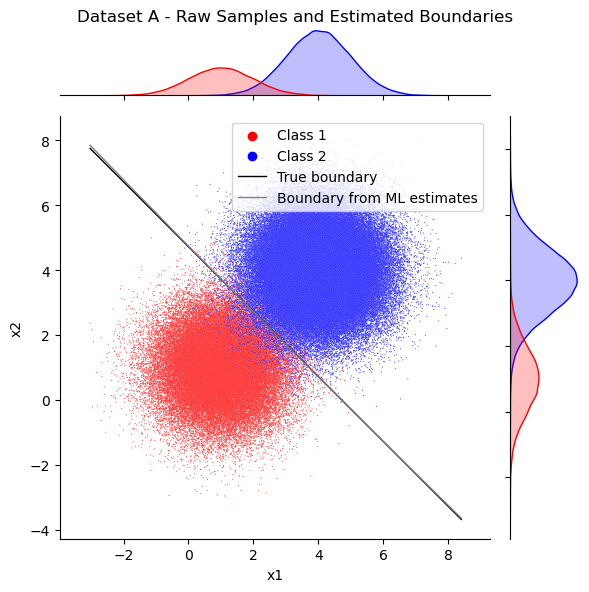

In [6]:
ax = datasetA_ML.make_plot(plot_type='seaborn', sort_type='raw', title ='Dataset A - Raw Samples and Estimated Boundaries', show_boundary=False)
# add true boundary from given params
ax.ax_joint.plot(np.array(datasetA.df.x1.sort_values()), np.array(datasetA.boundary_function(datasetA_ML.df.x1.sort_values())), lw=1,color='k', label='True boundary')

#add ML estimated boundary (no assumptions/rounding for estimated covariance matrix)
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary[0](datasetA_ML.df.x1.sort_values())), lw=1,color='grey', label='Boundary from ML estimates')


ax.ax_joint.legend(loc='upper right')




## Part (b)
### Next, you will test how the number of training data affects parameter estimation and consequently, classification accuracy. For this, consider using only (i) 0.01%, (ii) 0.1%, (iii) 1%, and (vi) 10% of the samples from each density (randomly chosen) to estimate the parameters of the two densities using ML. Then, classify all 200,000 samples for each case, count the number of misclassified samples (for each class and overall), and compare your results with those obtained in (1.a).

### (i) 0.01%

In [7]:
datasetA_ML.classify_using_ML_estimates(print_params=True, training_size=0.0001)  
ML_estimated_boundary_001 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6
Number of samples used from class 2 : 14

 ML Estimated Means: 

Sample 1 : [0.8123355251448224, 0.6542570359524086]
Sample 2 : [3.847348394361645, 4.300525252663553]

 ML Estimated Covariances: 

Sample 1 : [[1.26582959 0.13102945]
 [0.13102945 0.06413848]]
Sample 2 : [[0.69345853 0.22318866]
 [0.22318866 0.54422446]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [17298, 1304]
Misclassification rate by class: [0.2883     0.00931429]
Total misclassification rate: 0.09301

 ****************************************************************** 



### (ii) 0.1%

In [8]:
datasetA_ML.classify_using_ML_estimates(print_params=True, training_size=0.001) 
ML_estimated_boundary_01 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)



 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60
Number of samples used from class 2 : 140

 ML Estimated Means: 

Sample 1 : [0.8225988179488187, 0.9172535695041794]
Sample 2 : [4.0995752056489545, 4.055502434602157]

 ML Estimated Covariances: 

Sample 1 : [[1.23085745 0.22173152]
 [0.22173152 0.7378921 ]]
Sample 2 : [[1.0092033  0.01435404]
 [0.01435404 0.8405696 ]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1478, 1840]
Misclassification rate by class: [0.02463333 0.01314286]
Total misclassification rate: 0.01659

 ****************************************************************** 



### (iii) 1%

In [9]:
datasetA_ML.classify_using_ML_estimates(print_params=True, training_size=0.01)  
ML_estimated_boundary_1 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)



 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 600
Number of samples used from class 2 : 1400

 ML Estimated Means: 

Sample 1 : [0.9503036800748929, 0.9244012004219841]
Sample 2 : [4.021595533686607, 4.00309676415328]

 ML Estimated Covariances: 

Sample 1 : [[1.02624498 0.04957027]
 [0.04957027 0.99147816]]
Sample 2 : [[1.04434352 0.02185456]
 [0.02185456 0.99537656]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1729, 1300]
Misclassification rate by class: [0.02881667 0.00928571]
Total misclassification rate: 0.015145

 ****************************************************************** 



### (vi) 10%

In [10]:
datasetA_ML.classify_using_ML_estimates(print_params=True, training_size=0.1)
ML_estimated_boundary_10 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6000
Number of samples used from class 2 : 14000

 ML Estimated Means: 

Sample 1 : [0.9870200000375329, 0.9800307852674556]
Sample 2 : [4.009156500018937, 3.9862694088777926]

 ML Estimated Covariances: 

Sample 1 : [[ 0.9930342  -0.01515895]
 [-0.01515895  1.01335585]]
Sample 2 : [[ 1.00985040e+00 -2.57746743e-04]
 [-2.57746743e-04  1.00245075e+00]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1682, 1335]
Misclassification rate by class: [0.02803333 0.00953571]
Total misclassification rate: 0.015085

 ****************************************************************** 



### (v) 100%

In [11]:
datasetA_ML.classify_using_ML_estimates(print_params=True, training_size='all')
ML_estimated_boundary_all = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [0.9947335309849321, 0.9993340872355969]
Sample 2 : [3.9989997647685853, 3.9951898904939456]

 ML Estimated Covariances: 

Sample 1 : [[ 0.99284676 -0.00905706]
 [-0.00905706  1.00031409]]
Sample 2 : [[ 0.99645636 -0.00154648]
 [-0.00154648  0.99716691]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1627, 1399]
Misclassification rate by class: [0.02711667 0.00999286]
Total misclassification rate: 0.01513

 ****************************************************************** 



### Plotting the boundaries using each set of estimated parameters

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


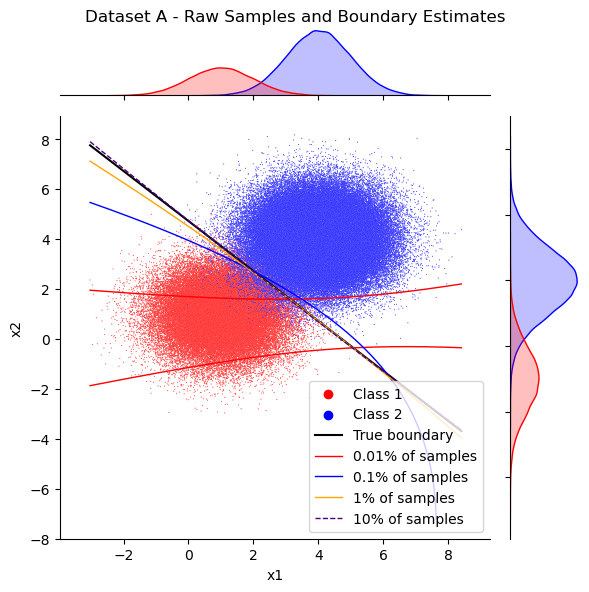

In [12]:
ax = datasetA_ML.make_plot(plot_type='seaborn', sort_type='raw', title='Dataset A - Raw Samples and Boundary Estimates', show_boundary=False)

#100%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(datasetA.boundary_function(datasetA_ML.df.x1.sort_values())), lw=1.5,color='k', label='True boundary')


#0.01%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[0](datasetA_ML.df.x1.sort_values())), lw=1,color='red', label='0.01% of samples')
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[1](datasetA_ML.df.x1.sort_values())), lw=1,color='red')

#.1%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[1](datasetA_ML.df.x1.sort_values())), lw=1,color='blue',label='0.1% of samples')

#1%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1[1](datasetA_ML.df.x1.sort_values())), lw=1,color='orange', label='1% of samples')

#10%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10[0](datasetA_ML.df.x1.sort_values())),'--', lw=1, color='indigo', label='10% of samples')



ax.ax_joint.set_aspect('auto') 
ax.ax_joint.legend(loc='lower right')

## sub-analysis: 

### Experiment with (a) choosing the optimum Case number based on the estimated covariance matrices (since we do not really know the true covariance matrices in practice) and (b) choosing the optimum Case number after explicitly setting the off-diagonal elements of the covariance matrices to zero by assuming that the features are uncorrelated. Carefully analyze your results.


### choosing the optimum Case number after explicitly setting the off-diagonal elements of the covariance matrices to zero

### (i) using 0.01% of data

In [13]:
datasetA_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.0001)  
ML_estimated_boundary_001 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6
Number of samples used from class 2 : 14

 ML Estimated Means: 

Sample 1 : [0.8 0.7]
Sample 2 : [3.8 4.3]

 ML Estimated Covariances: 

Sample 1 : [[1.3 0. ]
 [0.  0.1]]
Sample 2 : [[0.7 0. ]
 [0.  0.5]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [8135, 1123]
Misclassification rate by class: [0.13558333 0.00802143]
Total misclassification rate: 0.04629

 ****************************************************************** 



### (ii) using 0.1% of data

In [14]:
datasetA_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.001)  
ML_estimated_boundary_01 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60
Number of samples used from class 2 : 140

 ML Estimated Means: 

Sample 1 : [0.8 0.9]
Sample 2 : [4.1 4.1]

 ML Estimated Covariances: 

Sample 1 : [[1.2 0. ]
 [0.  0.7]]
Sample 2 : [[1.  0. ]
 [0.  0.8]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1661, 1603]
Misclassification rate by class: [0.02768333 0.01145   ]
Total misclassification rate: 0.01632

 ****************************************************************** 



### (iii) using 1% of data

In [15]:
datasetA_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.01)  
ML_estimated_boundary_1 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 600
Number of samples used from class 2 : 1400

 ML Estimated Means: 

Sample 1 : [1.  0.9]
Sample 2 : [4. 4.]

 ML Estimated Covariances: 

Sample 1 : [[1. 0.]
 [0. 1.]]
Sample 2 : [[1. 0.]
 [0. 1.]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1725, 1297]
Misclassification rate by class: [0.02875    0.00926429]
Total misclassification rate: 0.01511

 ****************************************************************** 



### (vi) using 10% of data

In [16]:
datasetA_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.1)  
ML_estimated_boundary_10 = datasetA_ML.boundary_function
datasetA_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6000
Number of samples used from class 2 : 14000

 ML Estimated Means: 

Sample 1 : [1. 1.]
Sample 2 : [4. 4.]

 ML Estimated Covariances: 

Sample 1 : [[ 1. -0.]
 [-0.  1.]]
Sample 2 : [[ 1. -0.]
 [-0.  1.]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1603, 1414]
Misclassification rate by class: [0.02671667 0.0101    ]
Total misclassification rate: 0.015085

 ****************************************************************** 



### (v) using 100% of data

In [17]:
## classify using the ML estimated mu and cov params; rounding the estimates and assuming no correlation between features
datasetA_ML.classify_using_ML_estimates(corr=False, round_estimates=True, print_params=True)  
datasetA_ML.get_true_error(print_params=True)
ML_estimated_boundary_rounded = datasetA_ML.boundary_function


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [1. 1.]
Sample 2 : [4. 4.]

 ML Estimated Covariances: 

Sample 1 : [[ 1. -0.]
 [-0.  1.]]
Sample 2 : [[ 1. -0.]
 [-0.  1.]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [1603, 1414]
Misclassification rate by class: [0.02671667 0.0101    ]
Total misclassification rate: 0.015085

 ****************************************************************** 



### Plotting the boundaries using each set of estimated parameters

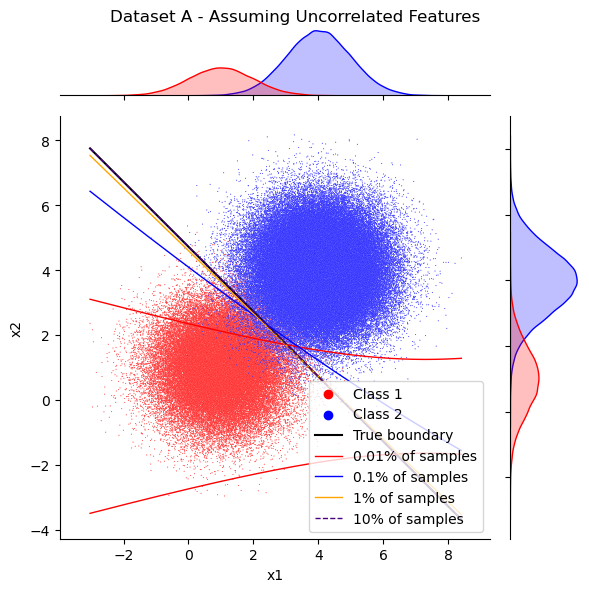

In [18]:
ax = datasetA_ML.make_plot(plot_type='seaborn', sort_type='raw', title='Dataset A - Assuming Uncorrelated Features', show_boundary=False)

#100%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_rounded(datasetA_ML.df.x1.sort_values())), lw=1.5,color='k', label='True boundary')


#0.01%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[0](datasetA_ML.df.x1.sort_values())), lw=1,color='red', label='0.01% of samples')
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[1](datasetA_ML.df.x1.sort_values())), lw=1,color='red')

#.1%
#ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[0](datasetA_ML.df.x1.sort_values())), lw=1,color='blue',label='0.1% of samples')
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[1](datasetA_ML.df.x1.sort_values())), lw=1,color='blue',label='0.1% of samples')

#1%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1(datasetA_ML.df.x1.sort_values())), lw=1,color='orange', label='1% of samples')

#10%
ax.ax_joint.plot(np.array(datasetA_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10(datasetA_ML.df.x1.sort_values())),'--', lw=1, color='indigo', label='10% of samples')



ax.ax_joint.set_aspect('auto') 
ax.ax_joint.legend(loc='lower right')

# Experiment 2

## Repeat experiment 1 using the 2D Gaussian densities for sample B; for comparison purposes, use exactly the same 200,000 samples from assignment #1.


## Part (a)
### Using exactly the same 200,000 samples from assignment #1 (i.e., 60,000 samples from N(μ1,Σ1) and 140,000 samples from N(μ2,Σ2)), estimate the parameters of each distribution using the ML approach. Then, classify all 200,000 samples using a Bayes classifier, count the number of misclassifications (for each class and overall), and compare your results with those obtained from assignment #1.

In [19]:
# data B params
mu1 = np.array([1,1])
cov1 = np.array([[1,0],[0,1]])
mu2 = np.array([4,4])
cov2 = np.array([[4,0],[0,8]])

mu= [mu1,mu2 ]
cov =[cov1, cov2]
n_samples= [60000,140000]

In [20]:
datasetB_ML = ML.ML_Estimator(mu,cov, n_samples)

## classify using the ML estimated mu and cov params 
datasetB_ML.classify_using_ML_estimates(print_params=True,)  

ML_estimated_boundary = datasetB_ML.boundary_function

datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [0.9947335309849321, 0.9993340872355969]
Sample 2 : [3.990379780987892, 3.99717090754034]

 ML Estimated Covariances: 

Sample 1 : [[ 0.99284676 -0.00905706]
 [-0.00905706  1.00031409]]
Sample 2 : [[ 3.98866766 -0.00874819]
 [-0.00874819  7.97165084]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4936, 10143]
Misclassification rate by class: [0.08226667 0.07245   ]
Total misclassification rate: 0.075395

 ****************************************************************** 



### Comparing with assignment 1 results

In [21]:
datasetB = BC.SampleData(mu,cov, n_samples)
datasetB.run_all_analysis()
datasetB.get_true_error(print_params=True)



 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4885, 10206]
Misclassification rate by class: [0.08141667 0.0729    ]
Total misclassification rate: 0.075455

 ****************************************************************** 



### Plotting the boundaries from true and estimated parameters

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


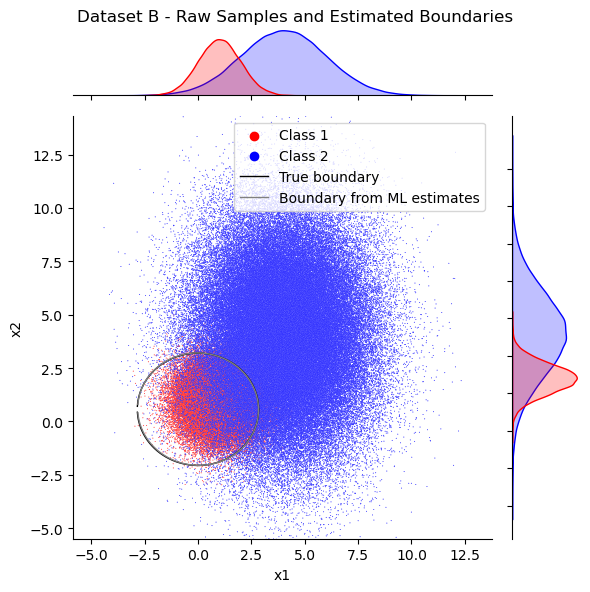

In [22]:
ax = datasetB_ML.make_plot(plot_type='seaborn', sort_type='raw', title ='Dataset B - Raw Samples and Estimated Boundaries', show_boundary=False)
# add true boundary from given params
ax.ax_joint.plot(np.array(datasetB.df.x1.sort_values()), np.array(datasetB.boundary_function[0](datasetB_ML.df.x1.sort_values())), lw=1,color='k', label='True boundary')
ax.ax_joint.plot(np.array(datasetB.df.x1.sort_values()), np.array(datasetB.boundary_function[1](datasetB_ML.df.x1.sort_values())), lw=1,color='k')


#add ML estimated boundary (no assumptions/rounding for estimated covariance matrix)
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary[0](datasetB_ML.df.x1.sort_values())), lw=1,color='grey', label='Boundary from ML estimates')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary[1](datasetB_ML.df.x1.sort_values())), lw=1,color='grey')



ax.ax_joint.legend(loc='upper right')



## Part (b)
### Next, you will test how the number of training data affects parameter estimation and consequently, classification accuracy. For this, consider using only (i) 0.01%, (ii) 0.1%, (iii) 1%, and (vi) 10% of the samples from each density (randomly chosen) to estimate the parameters of the two densities using ML. Then, classify all 200,000 samples for each case, count the number of misclassified samples (for each class and overall), and compare your results with those obtained in (1.a).

### (i) 0.01%

In [23]:
datasetB_ML.classify_using_ML_estimates(print_params=True, training_size=0.0001)  
ML_estimated_boundary_001 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6
Number of samples used from class 2 : 14

 ML Estimated Means: 

Sample 1 : [0.8123355251448224, 0.6542570359524086]
Sample 2 : [4.601050505327105, 3.5682360579764194]

 ML Estimated Covariances: 

Sample 1 : [[1.26582959 0.13102945]
 [0.13102945 0.06413848]]
Sample 2 : [[2.17689785 1.26254571]
 [1.26254571 5.54766826]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [32144, 3674]
Misclassification rate by class: [0.53573333 0.02624286]
Total misclassification rate: 0.17909

 ****************************************************************** 



### (ii) 0.1%

In [24]:
datasetB_ML.classify_using_ML_estimates(print_params=True, training_size=0.001) 
ML_estimated_boundary_01 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)



 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60
Number of samples used from class 2 : 140

 ML Estimated Means: 

Sample 1 : [0.8225988179488187, 0.9172535695041794]
Sample 2 : [4.111004869204315, 4.281641212609684]

 ML Estimated Covariances: 

Sample 1 : [[1.23085745 0.22173152]
 [0.22173152 0.7378921 ]]
Sample 2 : [[3.36227842 0.08119872]
 [0.08119872 8.07362643]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [6095, 9505]
Misclassification rate by class: [0.10158333 0.06789286]
Total misclassification rate: 0.078

 ****************************************************************** 



### (iii) 1%

In [25]:
datasetB_ML.classify_using_ML_estimates(print_params=True, training_size=0.01)  
ML_estimated_boundary_1 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)



 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 600
Number of samples used from class 2 : 1400

 ML Estimated Means: 

Sample 1 : [0.9503036800748929, 0.9244012004219841]
Sample 2 : [4.006193528306562, 4.061081393252568]

 ML Estimated Covariances: 

Sample 1 : [[1.02624498 0.04957027]
 [0.04957027 0.99147816]]
Sample 2 : [[3.98150624 0.12362808]
 [0.12362808 8.35474819]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [5257, 9864]
Misclassification rate by class: [0.08761667 0.07045714]
Total misclassification rate: 0.075605

 ****************************************************************** 



### (vi) 10%

In [26]:
datasetB_ML.classify_using_ML_estimates(print_params=True, training_size=0.1)
ML_estimated_boundary_10 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6000
Number of samples used from class 2 : 14000

 ML Estimated Means: 

Sample 1 : [0.9870200000375329, 0.9800307852674556]
Sample 2 : [3.972538817755585, 4.025898493021303]

 ML Estimated Covariances: 

Sample 1 : [[ 0.9930342  -0.01515895]
 [-0.01515895  1.01335585]]
Sample 2 : [[ 4.00980299e+00 -1.45803576e-03]
 [-1.45803576e-03  8.07880317e+00]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4999, 10087]
Misclassification rate by class: [0.08331667 0.07205   ]
Total misclassification rate: 0.07543

 ****************************************************************** 



### (v) 100%

In [27]:
datasetB_ML.classify_using_ML_estimates(print_params=True, training_size='all')
ML_estimated_boundary_all = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [0.9947335309849321, 0.9993340872355969]
Sample 2 : [3.990379780987892, 3.99717090754034]

 ML Estimated Covariances: 

Sample 1 : [[ 0.99284676 -0.00905706]
 [-0.00905706  1.00031409]]
Sample 2 : [[ 3.98866766 -0.00874819]
 [-0.00874819  7.97165084]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4936, 10143]
Misclassification rate by class: [0.08226667 0.07245   ]
Total misclassification rate: 0.075395

 ****************************************************************** 



### Plotting the boundaries using each set of estimated parameters

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


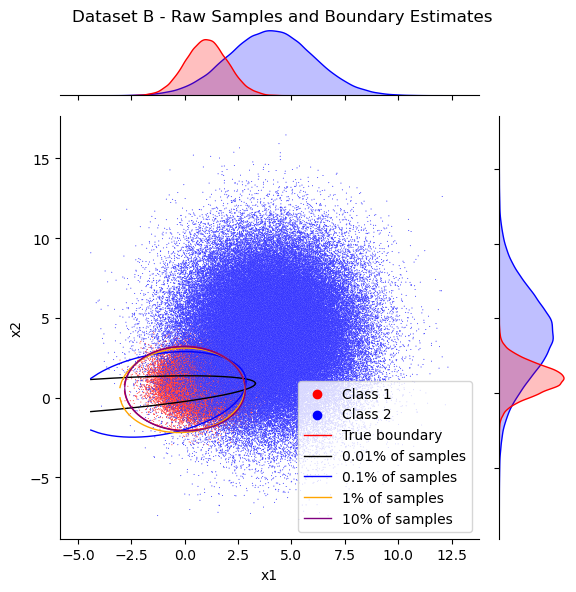

In [28]:
ax = datasetB_ML.make_plot(plot_type='seaborn', sort_type='raw', title='Dataset B - Raw Samples and Boundary Estimates', show_boundary=False)


# add true boundary from given params
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_all[0](datasetB_ML.df.x1.sort_values())), lw=1,color='red', label='True boundary')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_all[1](datasetB_ML.df.x1.sort_values())), lw=1,color='red',)


#add ML estimated boundary (no assumptions/rounding)
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[0](datasetB_ML.df.x1.sort_values())), lw=1,color='k', label='0.01% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[1](datasetB_ML.df.x1.sort_values())), lw=1,color='k')


#add ML estimated boundary (assume no correlation)
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[0](datasetB_ML.df.x1.sort_values())), lw=1,color='blue',label='0.1% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[1](datasetB_ML.df.x1.sort_values())), lw=1,color='blue')



#add ML estimated boundary (no correlation, rounded values)
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1[0](datasetB_ML.df.x1.sort_values())), lw=1,color='orange', label='1% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1[1](datasetB_ML.df.x1.sort_values())), lw=1,color='orange')

#add ML estimated boundary (no correlation, rounded values)
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10[0](datasetB_ML.df.x1.sort_values())), lw=1,color='purple', label='10% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10[1](datasetB_ML.df.x1.sort_values())), lw=1,color='purple')



ax.ax_joint.set_aspect('auto') 
ax.ax_joint.legend(loc='lower right')

## sub-analysis: 

### Experiment with (a) choosing the optimum Case number based on the estimated covariance matrices (since we do not really know the true covariance matrices in practice) and (b) choosing the optimum Case number after explicitly setting the off-diagonal elements of the covariance matrices to zero by assuming that the features are uncorrelated. Carefully analyze your results.


### choosing the optimum Case number after explicitly setting the off-diagonal elements of the covariance matrices to zero

### (i) using 0.01% of data

In [29]:
datasetB_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.0001)  
ML_estimated_boundary_001 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6
Number of samples used from class 2 : 14

 ML Estimated Means: 

Sample 1 : [0.8 0.7]
Sample 2 : [4.6 3.6]

 ML Estimated Covariances: 

Sample 1 : [[1.3 0. ]
 [0.  0.1]]
Sample 2 : [[2.2 0. ]
 [0.  5.5]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [21691, 5425]
Misclassification rate by class: [0.36151667 0.03875   ]
Total misclassification rate: 0.13558

 ****************************************************************** 



### (ii) using 0.1% of data

In [30]:
datasetB_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.001)  
ML_estimated_boundary_01 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60
Number of samples used from class 2 : 140

 ML Estimated Means: 

Sample 1 : [0.8 0.9]
Sample 2 : [4.1 4.3]

 ML Estimated Covariances: 

Sample 1 : [[1.2 0. ]
 [0.  0.7]]
Sample 2 : [[3.4 0. ]
 [0.  8.1]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [6004, 9379]
Misclassification rate by class: [0.10006667 0.06699286]
Total misclassification rate: 0.076915

 ****************************************************************** 



### (iii) using 1% of data

In [31]:
datasetB_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.01)  
ML_estimated_boundary_1 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 600
Number of samples used from class 2 : 1400

 ML Estimated Means: 

Sample 1 : [1.  0.9]
Sample 2 : [4.  4.1]

 ML Estimated Covariances: 

Sample 1 : [[1. 0.]
 [0. 1.]]
Sample 2 : [[4.  0. ]
 [0.  8.4]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [5033, 10140]
Misclassification rate by class: [0.08388333 0.07242857]
Total misclassification rate: 0.075865

 ****************************************************************** 



### (vi) using 10% of data

In [32]:
datasetB_ML.classify_using_ML_estimates(print_params=True,corr=False, round_estimates=True, training_size=0.1)  
ML_estimated_boundary_10 = datasetB_ML.boundary_function
datasetB_ML.get_true_error(print_params=True)


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 6000
Number of samples used from class 2 : 14000

 ML Estimated Means: 

Sample 1 : [1. 1.]
Sample 2 : [4. 4.]

 ML Estimated Covariances: 

Sample 1 : [[ 1. -0.]
 [-0.  1.]]
Sample 2 : [[ 4.  -0. ]
 [-0.   8.1]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4890, 10215]
Misclassification rate by class: [0.0815     0.07296429]
Total misclassification rate: 0.075525

 ****************************************************************** 



### (v) using 100% of data

In [33]:
## classify using the ML estimated mu and cov params; rounding the estimates and assuming no correlation between features
datasetB_ML.classify_using_ML_estimates(corr=False, round_estimates=True, print_params=True)  
datasetB_ML.get_true_error(print_params=True)
ML_estimated_boundary_rounded = datasetB_ML.boundary_function


 ****************************************************************** 

ML Param Estimates of Randomly Generated Samples: 

Number of samples used from class 1 : 60000
Number of samples used from class 2 : 140000

 ML Estimated Means: 

Sample 1 : [1. 1.]
Sample 2 : [4. 4.]

 ML Estimated Covariances: 

Sample 1 : [[ 1. -0.]
 [-0.  1.]]
Sample 2 : [[ 4. -0.]
 [-0.  8.]]

 ****************************************************************** 


 ****************************************************************** 


 Empirical Error Stats: 

N samples misclassified: [4885, 10206]
Misclassification rate by class: [0.08141667 0.0729    ]
Total misclassification rate: 0.075455

 ****************************************************************** 



### Plotting the boundaries using each set of estimated parameters

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


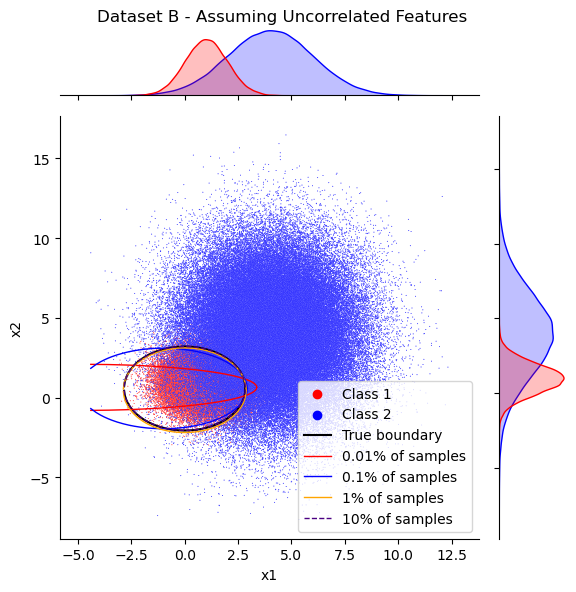

In [34]:
ax = datasetB_ML.make_plot(plot_type='seaborn', sort_type='raw', title='Dataset B - Assuming Uncorrelated Features', show_boundary=False)

#100%
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_rounded[0](datasetB_ML.df.x1.sort_values())), lw=1.5,color='k', label='True boundary')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_rounded[1](datasetB_ML.df.x1.sort_values())), lw=1.5,color='k',)




#0.01%
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[0](datasetB_ML.df.x1.sort_values())), lw=1,color='red', label='0.01% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_001[1](datasetB_ML.df.x1.sort_values())), lw=1,color='red')

#.1%
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[0](datasetB_ML.df.x1.sort_values())), lw=1,color='blue',label='0.1% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_01[1](datasetB_ML.df.x1.sort_values())), lw=1,color='blue')

#1%
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1[0](datasetB_ML.df.x1.sort_values())), lw=1,color='orange', label='1% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_1[1](datasetB_ML.df.x1.sort_values())), lw=1,color='orange')

#10%
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10[0](datasetB_ML.df.x1.sort_values())),'--', lw=1, color='indigo', label='10% of samples')
ax.ax_joint.plot(np.array(datasetB_ML.df.x1.sort_values()), np.array(ML_estimated_boundary_10[1](datasetB_ML.df.x1.sort_values())),'--', lw=1, color='indigo')




ax.ax_joint.set_aspect('auto') 
ax.ax_joint.legend(loc='lower right')

# Experiment 3 

## Face detection using skin color is a popular approach. While color images are typically in RGB format, most techniques transform RGB to a different color space (e.g., chromatic, HSV, etc.). This is because RGB values are more sensitive to variations in brightness due to illumination changes.



## (a) Implement the skin-color methodology of [Yang96 “A Real-time Face Tracker”] which uses the chromatic color space

### Use 'Training_1.ppm' to build the skin color model

In [35]:
img1 = cv2.imread('Data_Prog2/Training_1.ppm')
img2 = cv2.imread('Data_Prog2/ref1.ppm')

In [36]:

experiment3_training_rg = IC.ImageClassifier()
experiment3_training_rg.classify_image(training_img = img1,ref_img=img2, color_space='chromatic',analysis_type='train',)


In [37]:
print('mu_hat:', experiment3_training_rg.mu)
print('cov_hat', experiment3_training_rg.cov)

mu_hat: [[0.43222356 0.29577095]]
cov_hat [array([[ 0.00243324, -0.00111725],
       [-0.00111725,  0.00078844]])]


(-0.5, 1855.5, 1391.5, -0.5)

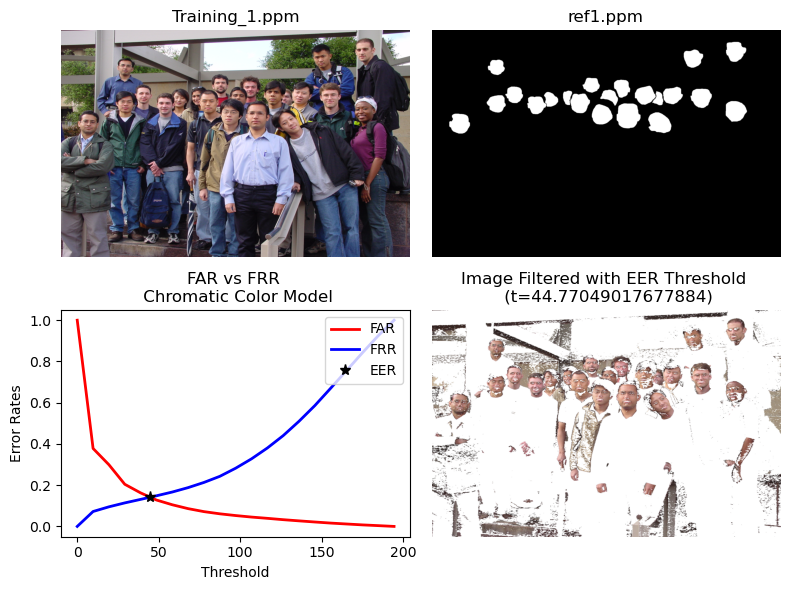

In [38]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_training_rg.training_img, aspect="auto")
ax[0,1].imshow(experiment3_training_rg.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_1.ppm')
ax[0,1].set_title('ref1.ppm')


ax[1,0].plot(experiment3_training_rg.ROC_df.t,experiment3_training_rg.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_training_rg.ROC_df.t,experiment3_training_rg.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_training_rg.EER_thresh, experiment3_training_rg.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n Chromatic Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_training_rg.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_training_rg.EER_thresh[0])
ax[1,1].axis('off')

### Test the model on training image 3 

In [39]:
img3 = cv2.imread('Data_Prog2/Training_3.ppm')
img4 = cv2.imread('Data_Prog2/ref3.ppm')

In [40]:
experiment3_test1_rg = IC.ImageClassifier()
experiment3_test1_rg.classify_image(training_img = img3,ref_img=img4, params=[experiment3_training_rg.mu,experiment3_training_rg.cov], color_space='chromatic', analysis_type='test')



(-0.5, 1855.5, 1391.5, -0.5)

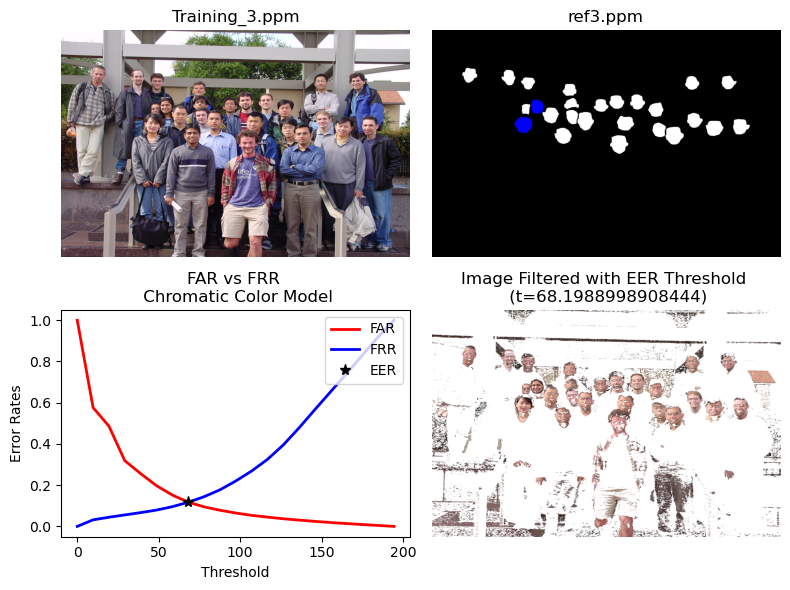

In [41]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_test1_rg.training_img, aspect="auto")
ax[0,1].imshow(experiment3_test1_rg.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_3.ppm')
ax[0,1].set_title('ref3.ppm')


ax[1,0].plot(experiment3_test1_rg.ROC_df.t,experiment3_test1_rg.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_test1_rg.ROC_df.t,experiment3_test1_rg.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_test1_rg.EER_thresh, experiment3_test1_rg.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n Chromatic Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_test1_rg.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_test1_rg.EER_thresh[0])
ax[1,1].axis('off')

### Test the model on training image 6

In [42]:
img5 = cv2.imread('Data_Prog2/Training_6.ppm')
img6 = cv2.imread('Data_Prog2/ref6.ppm')

In [43]:
experiment3_test2_rg = IC.ImageClassifier()
experiment3_test2_rg.classify_image(training_img = img5,ref_img=img6, params=[experiment3_training_rg.mu,experiment3_training_rg.cov], color_space='chromatic', analysis_type='test')



(-0.5, 1855.5, 1391.5, -0.5)

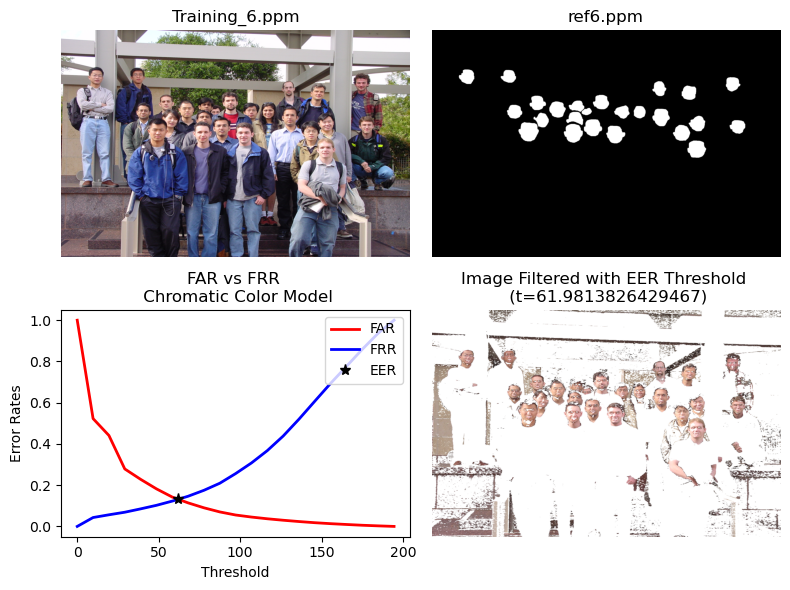

In [44]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_test2_rg.training_img, aspect="auto")
ax[0,1].imshow(experiment3_test2_rg.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_6.ppm')
ax[0,1].set_title('ref6.ppm')


ax[1,0].plot(experiment3_test2_rg.ROC_df.t,experiment3_test2_rg.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_test2_rg.ROC_df.t,experiment3_test2_rg.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_test2_rg.EER_thresh, experiment3_test2_rg.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n Chromatic Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_test2_rg.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_test2_rg.EER_thresh[0])
ax[1,1].axis('off')

### generate ROC plots (i.e., FPR in the x-axis vs FNR in the y-axis) by varying the threshold t. To generate a reasonably smooth ROC curve, select 20 different thresholds in the interval [0, c] (i.e., uniformly distributed using a step=c/20) where c is the normalizing factor of the Gaussian function (i.e., c=1/2π|Σ|1/2) which is the max value achieved by g(x) when μ=0). 

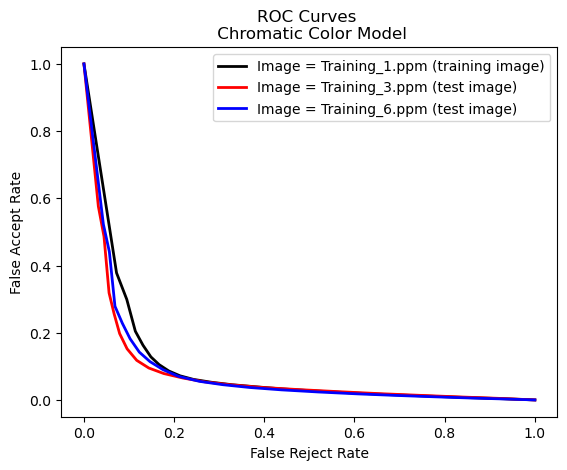

In [45]:
plt.plot(experiment3_training_rg.ROC_df.FRR,experiment3_training_rg.ROC_df.FPR,color='k', lw=2, label='Image = Training_1.ppm (training image)') 
plt.plot(experiment3_test1_rg.ROC_df.FRR,experiment3_test1_rg.ROC_df.FPR,color='red', lw=2, label='Image = Training_3.ppm (test image)') 
plt.plot(experiment3_test2_rg.ROC_df.FRR,experiment3_test2_rg.ROC_df.FPR,color='blue', lw=2, label='Image = Training_6.ppm (test image)') 
plt.ylabel('False Accept Rate')
plt.xlabel('False Reject Rate')
plt.title('ROC Curves \n Chromatic Color Model')
plt.legend(loc='upper right')

## (b) In this experiment, you will investigate the effect of using different features for classification. For this, you would need to repeat (3.a) using the YCbCr color space. The RGB components can be converted to the YCbCr components using the given transformation.

### Use 'Training_1.ppm' to build the skin color model

In [46]:
experiment3_training_YCbCr = IC.ImageClassifier()
experiment3_training_YCbCr.classify_image(training_img = img1,ref_img=img2, color_space='YCbCr',analysis_type='train')


In [47]:
print('mu_hat:', experiment3_training_YCbCr.mu)
print('cov_hat', experiment3_training_YCbCr.cov)

mu_hat: [[-12.69134026  23.63426875]]
cov_hat [array([[ 31.19704223, -21.74165815],
       [-21.74165815,  48.94555422]])]


(-0.5, 1855.5, 1391.5, -0.5)

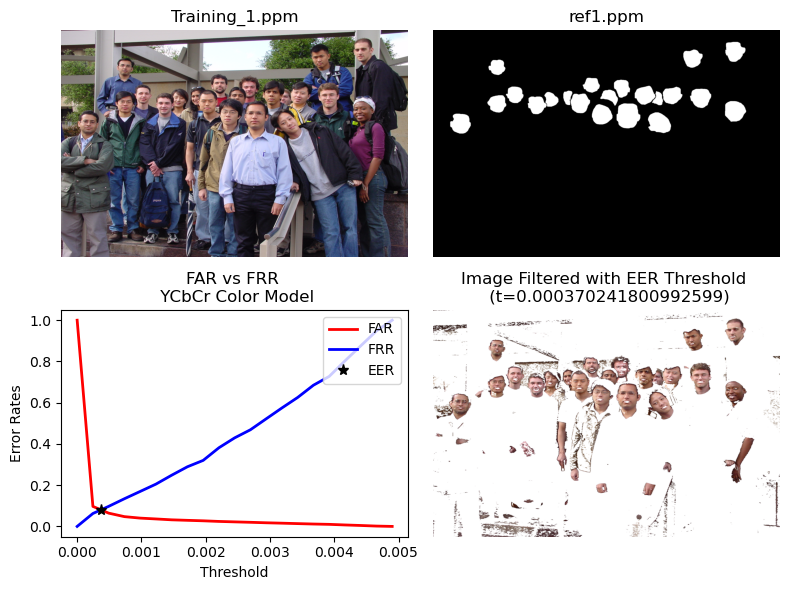

In [48]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_training_YCbCr.training_img, aspect="auto")
ax[0,1].imshow(experiment3_training_YCbCr.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_1.ppm')
ax[0,1].set_title('ref1.ppm')


ax[1,0].plot(experiment3_training_YCbCr.ROC_df.t,experiment3_training_YCbCr.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_training_YCbCr.ROC_df.t,experiment3_training_YCbCr.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_training_YCbCr.EER_thresh, experiment3_training_YCbCr.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n YCbCr Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_training_YCbCr.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_training_YCbCr.EER_thresh[0])
ax[1,1].axis('off')

### Use 'Training_3.ppm' to test the skin color model

In [49]:
experiment3_test1_YCbCr = IC.ImageClassifier()
experiment3_test1_YCbCr.classify_image(training_img = img3,ref_img=img4, params=[experiment3_training_YCbCr.mu,experiment3_training_YCbCr.cov], color_space='YCbCr', analysis_type='test') #x0=0.0005)


/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(-0.5, 1855.5, 1391.5, -0.5)

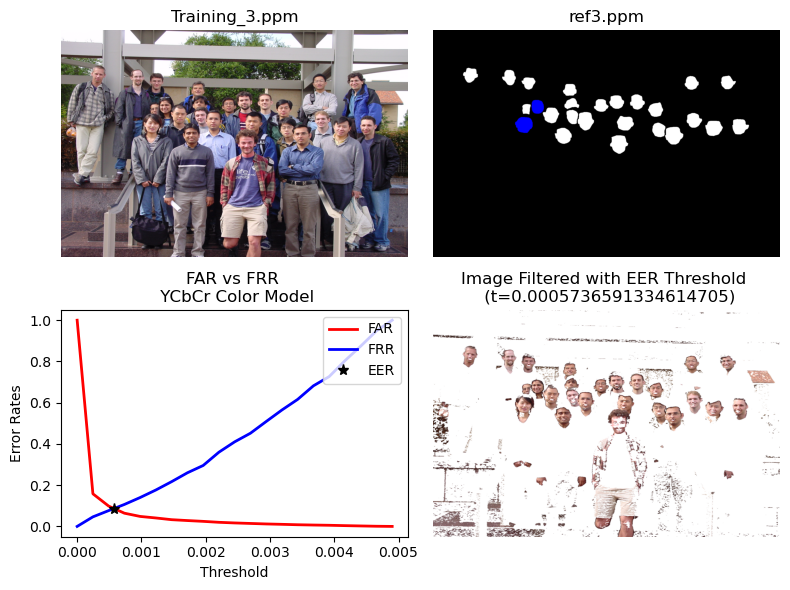

In [50]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_test1_YCbCr.training_img, aspect="auto")
ax[0,1].imshow(experiment3_test1_YCbCr.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_3.ppm')
ax[0,1].set_title('ref3.ppm')


ax[1,0].plot(experiment3_test1_YCbCr.ROC_df.t,experiment3_test1_YCbCr.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_test1_YCbCr.ROC_df.t,experiment3_test1_YCbCr.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_test1_YCbCr.EER_thresh, experiment3_test1_YCbCr.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n YCbCr Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_test1_YCbCr.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_test1_YCbCr.EER_thresh[0])
ax[1,1].axis('off')

### Use 'Training_6.ppm' to test the skin color model

In [51]:
experiment3_test2_YCbCr = IC.ImageClassifier()
experiment3_test2_YCbCr.classify_image(training_img = img5,ref_img=img6, params=[experiment3_training_YCbCr.mu,experiment3_training_YCbCr.cov], color_space='YCbCr', analysis_type='test') # x0=0.0006)


(-0.5, 1855.5, 1391.5, -0.5)

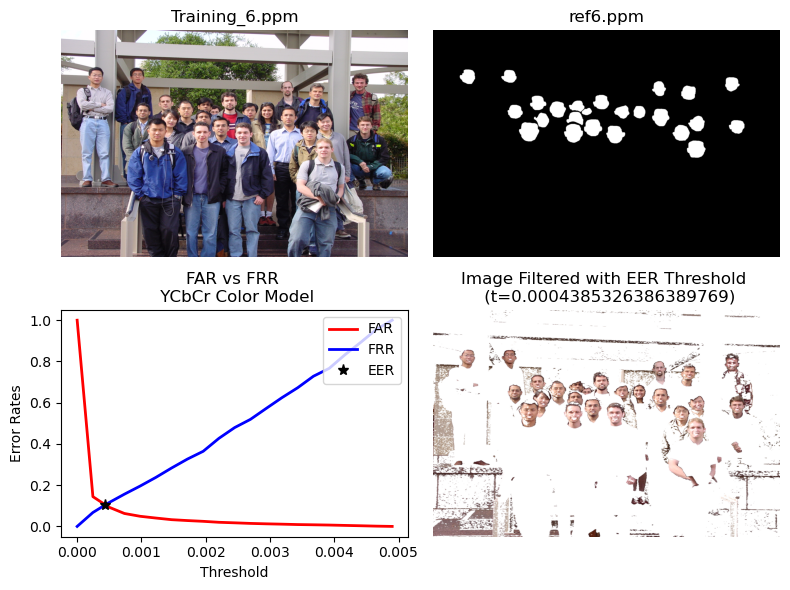

In [52]:
fig, ax=  plt.subplots(ncols=2, nrows=2, figsize=(8,6),layout='tight')
ax[0,0].imshow(experiment3_test2_YCbCr.training_img, aspect="auto")
ax[0,1].imshow(experiment3_test2_YCbCr.ref_img, aspect="auto")
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,0].set_title('Training_6.ppm')
ax[0,1].set_title('ref6.ppm')


ax[1,0].plot(experiment3_test2_YCbCr.ROC_df.t,experiment3_test2_YCbCr.ROC_df.FPR, color='red',lw=2,label='FAR') 
ax[1,0].plot(experiment3_test2_YCbCr.ROC_df.t,experiment3_test2_YCbCr.ROC_df.FRR, color='blue',lw=2, label='FRR') 
ax[1,0].plot(experiment3_test2_YCbCr.EER_thresh, experiment3_test2_YCbCr.EER_value,'*', color='k',markersize=8, label='EER')
ax[1,0].set_title('FAR vs FRR \n YCbCr Color Model')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Threshold')
ax[1,0].set_ylabel('Error Rates')
ax[1,1].imshow(experiment3_test2_YCbCr.EER_filtered_image, aspect="auto")
ax[1,1].set_title('Image Filtered with EER Threshold \n (t=%s)' % experiment3_test2_YCbCr.EER_thresh[0])
ax[1,1].axis('off')

### ROC Curves

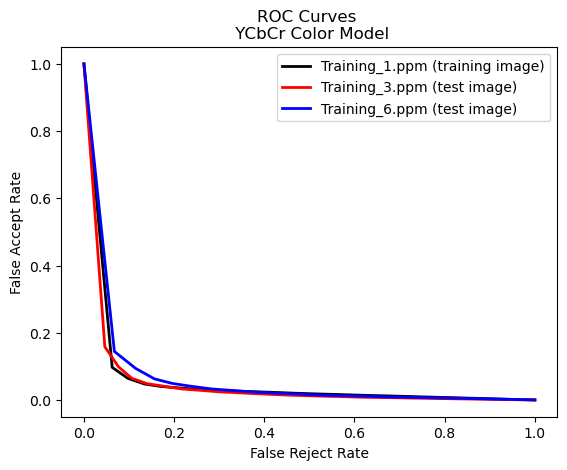

In [53]:
plt.plot(experiment3_training_YCbCr.ROC_df.FRR,experiment3_training_YCbCr.ROC_df.FPR,color='k', lw=2, label='Training_1.ppm (training image)') 
plt.plot(experiment3_test1_YCbCr.ROC_df.FRR,experiment3_test1_YCbCr.ROC_df.FPR,color='red', lw=2, label='Training_3.ppm (test image)') 
plt.plot(experiment3_test2_YCbCr.ROC_df.FRR,experiment3_test2_YCbCr.ROC_df.FPR,color='blue', lw=2, label='Training_6.ppm (test image)') 
plt.ylabel('False Accept Rate')
plt.xlabel('False Reject Rate')
plt.title('ROC Curves \n YCbCr Color Model')
plt.legend(loc='upper right')

### Comparing ROC Curves between models

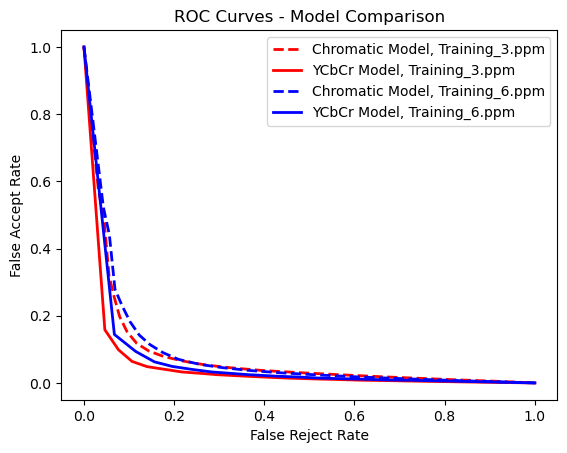

In [54]:
#plt.plot(experiment3_training_rg.ROC_df.FRR,experiment3_training_rg.ROC_df.FPR,'--',color='k', lw=1, label='Chromatic Model, Training_1.ppm') 
#plt.plot(experiment3_training_YCbCr.ROC_df.FRR,experiment3_training_YCbCr.ROC_df.FPR,color='k', lw=1, label='YCbCr Model, Training_1.ppm') 


plt.plot(experiment3_test1_rg.ROC_df.FRR,experiment3_test1_rg.ROC_df.FPR,'--',color='red', lw=2, label='Chromatic Model, Training_3.ppm') 
plt.plot(experiment3_test1_YCbCr.ROC_df.FRR,experiment3_test1_YCbCr.ROC_df.FPR,color='red', lw=2, label='YCbCr Model, Training_3.ppm')


plt.plot(experiment3_test2_rg.ROC_df.FRR,experiment3_test2_rg.ROC_df.FPR,'--',color='blue', lw=2, label='Chromatic Model, Training_6.ppm') 
plt.plot(experiment3_test2_YCbCr.ROC_df.FRR,experiment3_test2_YCbCr.ROC_df.FPR,color='blue', lw=2, label='YCbCr Model, Training_6.ppm') 

 
plt.ylabel('False Accept Rate')
plt.xlabel('False Reject Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='upper right')
